<a href="https://colab.research.google.com/github/Oloyedebabs/Text_image_classifier/blob/main/Text_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the necessary library

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

##Load and do preprocessing of the MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Reshape the data the image is 28 x 28 pixel

In [3]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28,28, 1))

Normalize the pixel value of the dataset to range 0 and 1 by dividing with 255 as image is in the grayscale

In [4]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

One hot encode to convert the class vector to binary matrices

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Build the LeNet model

In [6]:
def build_model(input_shape, classes):
  model = models.Sequential()
  #Add the first convolution layer with an out put of 20 and a 5 x 5 filter, use the ReLU activation. Then we will use a maxpooling ( 2 x 2)
  model.add(layers.Conv2D(20, (5,5), activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  #Add a second convolution layer with a filter size of (5 x5) and ReLu activation, then maxpooling of 2 pixel
  model.add(layers.Conv2D(50, (5,5), activation = 'relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  #Flatten the layer and build a network with dense layer of 500 neurons and using a softmax classifier.
  model.add(layers.Flatten())
  model.add(layers.Dense(500, activation='relu'))
  #Use softmax activation for the output, the class represent the number of digit (0-10)
  model.add(layers.Dense(classes, activation='softmax'))
  return model

#Define parameter

In [7]:
epochs = 10
#batch_size = 128
#verbose = 1
opti = tf.keras.optimizers.Adam()
#validation_split = 0.95
#IMG_ROWS, IMG_COLS = 28, 28
#INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
num_classes = 10

#Initialize the model

In [8]:
model = build_model(input_shape = (28,28,1), classes = num_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Compile the model

In [9]:
model.compile(loss = "categorical_crossentropy", optimizer = opti, metrics =["accuracy"] )
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

#Fit the model

During compiling we can have some customizatiion such as call back that can allow to monitor and customize training. In this case we can stop training early once we have reached peak performance and log metrics. But I wont use it in this model.

In [10]:
curve = model.fit(X_train, y_train, batch_size = 128, epochs = 9, verbose = 1, validation_split = 0.95 )

Epoch 1/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 432ms/step - accuracy: 0.4644 - loss: 1.7551 - val_accuracy: 0.8405 - val_loss: 0.4884
Epoch 2/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.8822 - loss: 0.4131 - val_accuracy: 0.9133 - val_loss: 0.2943
Epoch 3/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 414ms/step - accuracy: 0.9348 - loss: 0.2119 - val_accuracy: 0.9247 - val_loss: 0.2331
Epoch 4/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 423ms/step - accuracy: 0.9544 - loss: 0.1639 - val_accuracy: 0.9404 - val_loss: 0.1872
Epoch 5/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 399ms/step - accuracy: 0.9600 - loss: 0.1327 - val_accuracy: 0.9410 - val_loss: 0.1886
Epoch 6/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 392ms/step - accuracy: 0.9712 - loss: 0.1000 - val_accuracy: 0.9567 - val_loss: 0.1414
Epoch 7/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 409ms/step - accuracy: 0.9827 - loss: 0.0689 - val_accuracy: 0.9498 - val_loss: 0.1581
Epoch 8/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 411ms/step - accuracy: 0.9837 - loss: 0.0620 - val_accuracy: 0.961

My model performance starts to degrade after the 9th training epoch, there are options here. First is to run the model again with 9 training epochs (my preferred approach), use early stopping or a callback approach (from tensorflow.keras.callbacks import ModelCheckpoint) then checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True) finally model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_split = 0.95, callbacks=[checkpoint] )

#Predict model

In [11]:
y_hat = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


#Evaluate model

In [12]:
eva = model.evaluate(X_test, y_test, verbose = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9645 - loss: 0.1157


#print test score and test accuracy

In [13]:
print("\nTest score:", eva[0])
print('Test accuracy', eva[1])


Test score: 0.09981730580329895
Test accuracy 0.9700999855995178


#Plot the training history curve

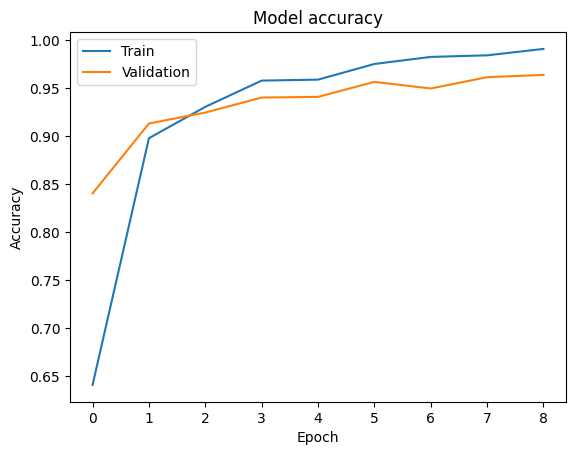

In [15]:
plt.plot(curve.history['accuracy'])
plt.plot(curve.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Plotting the training and validation loss

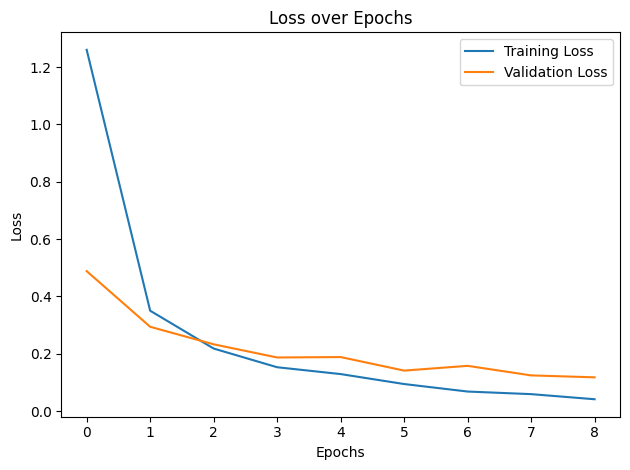

In [17]:
#plt.subplot(1, 2, 2)
plt.plot(curve.history['loss'], label='Training Loss')
plt.plot(curve.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#Display a few random images from the test dataset along with their predicted labels.

In [18]:
import numpy as np

In [20]:
def plot_sample_predictions(model, X_test, y_test):
    # Randomly select 10 images from the test set
    num_images = 10
    random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)

    X_sample = X_test[random_indices]
    y_true = np.argmax(y_test[random_indices], axis=1)  # Convert one-hot to class labels

    # Predict labels for the selected sample
    y_pred = np.argmax(model.predict(X_sample), axis=1)
    # Plot the images with the true and predicted labels
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X_sample[i].squeeze(), cmap='gray')  # Squeeze to remove extra dimension
        plt.title(f'True: {y_true[i]}\nPred: {y_pred[i]}')
        plt.axis('off')
    plt.show()

#Plot the image with prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


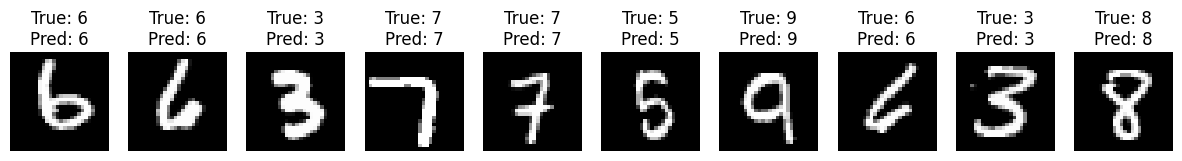

In [21]:
plot_sample_predictions(model, X_test, y_test)

#Save model

In [22]:
model.save('image_prediction.h5')